In [1]:
#!pip install konlpy
#!pip install wordcloud

In [2]:
import pandas as pd
import nltk # national language tool kit
from konlpy.corpus import kolaw
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from wordcloud import WordCloud

t = Okt()

In [3]:
# 한글 폰트 문제 해결
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')  # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'  # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")


In [4]:
# Warning무시
import warnings
warnings.filterwarnings('ignore')


In [5]:
ballad_happy20 = pd.read_csv("../../Data/ballad_happy20.csv")
ballad_happy20.head()


,가수명,노래제목,발매일,가사,좋아요수
0,양다일,Darling,2020-11-23,Oh darling 처음 널 만나면 수줍은 대화들로 사랑에 빠질 거야 My darl...,10907
1,장범준,잠이 오질 않네요,2020-10-24,당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게...,159018
2,백아연,어디라도,2020-11-18,우연의 다른 이름은 운명이란 걸 배웠죠 우리 사랑의 끝이 없는 걸 이제서야 알았죠 ...,1622
3,김제훈,Love Again,2017-02-06,언제부터였을까 따뜻한 휴식을 찾고 있을 때 찾고 있을 때 그때부터였을까 맘이 포근해...,980
4,김제훈,잠잠,2020-03-17,오랜만에 거길 가봤어 아무도 없는 둘만이 알던 곳 함께 걷던 거리에 서서 아무 말도...,548


In [6]:
happy20 = ""

In [7]:
for i in range(0, 20):
    happy20 += (" " + ballad_happy20['가사'][i])
print(happy20)


 Oh darling 처음 널 만나면 수줍은 대화들로 사랑에 빠질 거야 My darling 아마도 우린 손을 마주 잡고서 도시를 거닐 거야 비라도 오면 골목 어귀에 발을 멈추고서 바라보다가 입을 맞출지도 몰라 어둠이 오면 밝게 빛나는 별빛들 아래서 음악에 취해 서로에게 기대어 Darling My darling 멈춰버린 시간 속에서 우리 둘이서 영원토록 Darling My darling 함께 할 거야 너의 곁에서 눈을 감을 때까지 Oh darling 잊지 못할 거야 서로를 품에 안고 온기를 느끼던 날 My darling 따스할 거야 함께 잠이 들 때면 비추는 햇살들이 가끔씩 우린 아쉬울 거야 다른 모습들에 말을 멈추고 어색한 침묵이 올 때면 서운한 마음에 다투다 보면 오직 둘만 아는 그런 말들로 가벼운 미소가 될 거야 Darling My darling 멈춰버린 시간 속에서 우리 둘이서 영원토록 Darling My darling 함께 할 거야 너의 곁에서 눈을 감을 때까지 널 처음 마주한 순간 알 수 있었어 나를 보며 지었던 그 미소 그게 내 전부란 걸 Darling My darling 설레이는 내 마음을 담아 너에게 고백할게 영원토록 Darling My darling 나를 안아줘 너의 곁에서 눈을 감을 때까지 눈을 감을 때까지 눈을 감을 때까지  당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게 하는지 당신이 이 밤을 항상 잠 못 들게 해 매일 같은 밤 너를 생각하면서 유치한 노랠 들으며 심장이 춤을 추면서 오오 난 너를 기다리면서 유치한 노랠 부르며 심장이 춤을 추면서 워 나를 떨리게 하나요 그대 왜 나를 설레게 하나요 자꾸만 오늘도 잠 못 이루는 이 밤 아름다운 그대 나를 아프게 하나요 웃는 그대 왜 자꾸 설레게 하나요 하염없이 오늘 밤 잠이 오질 않네요 보고 싶은 그대여 당신이 날 힘들게 만들어 갑자기 내 마음 자꾸만 멍들게 해 얼마나 얼마나 잠 못 들게 하는지 고요한 내 마음 항상 시끄럽게 해 매일 같은 밤 너를 생각하면

In [8]:
# 명사 분리
token_happy = t.nouns(happy20)

In [9]:
# 기쁨테마 20곡의 상위 50개 단어 확인
# 이걸 보면서 불용어 선택하기
token_happy50 = nltk.Text(token_happy)
token_happy50.vocab().most_common(50)


[('너', 110),
 ('내', 81),
 ('그대', 48),
 ('사랑', 30),
 ('널', 28),
 ('말', 25),
 ('눈', 24),
 ('난', 24),
 ('왜', 24),
 ('날', 22),
 ('이', 22),
 ('밤', 22),
 ('생각', 22),
 ('수', 21),
 ('나', 21),
 ('때', 19),
 ('마음', 19),
 ('걸', 18),
 ('해', 18),
 ('맘', 18),
 ('우리', 17),
 ('곁', 16),
 ('어디', 16),
 ('것', 15),
 ('속', 14),
 ('오늘', 14),
 ('더', 14),
 ('두', 13),
 ('게', 13),
 ('하나요', 12),
 ('세상', 12),
 ('난난', 12),
 ('손', 11),
 ('그', 11),
 ('항상', 11),
 ('잠', 10),
 ('못', 10),
 ('자꾸', 10),
 ('사람', 10),
 ('다시', 10),
 ('아무', 10),
 ('바람', 10),
 ('모든', 10),
 ('우린', 9),
 ('순간', 9),
 ('일', 9),
 ('네', 9),
 ('크리스마스', 9),
 ('처음', 8),
 ('알', 8)]

In [38]:
# 불용어 추가
# 실행해보면서 추가하면서 바꿔야함.
stop_words20 = ['널','말','이','수','나','때','걸','해','것','속','더','두','게','난난','그','못','아무','일','네','알'
                '니','나나','곳','안','번','볼','젠','난','날','알','니','또','글자','중','감','다른','너','내','줄',
                "건","워","길","넌","불","온","적","발","거","만","돌","척","남","요","위","전","이건","외치","롤","테","뭐",
                "나로","녹","로","굽","픈","다한","워오채","뿐","타","즘","저","지고","곱","은","기만","굴","매","리지",
                "그대","옆","우리","왜","당신","모두","사람","손","하나요"
]
token_happy50 = [each_word for each_word in token_happy if each_word not in stop_words20]


In [39]:
# 후회테마 20곡의 상위 50개 단어 확인
# 불용어 처리후
token_happy50 = nltk.Text(token_happy50)
token_happy50.vocab().most_common(50)


[('사랑', 30),
 ('눈', 24),
 ('밤', 22),
 ('생각', 22),
 ('마음', 19),
 ('맘', 18),
 ('곁', 16),
 ('어디', 16),
 ('오늘', 14),
 ('세상', 12),
 ('항상', 11),
 ('잠', 10),
 ('자꾸', 10),
 ('다시', 10),
 ('바람', 10),
 ('모든', 10),
 ('우린', 9),
 ('순간', 9),
 ('크리스마스', 9),
 ('처음', 8),
 ('매일', 8),
 ('보고', 8),
 ('반짝', 8),
 ('심장', 7),
 ('이제', 7),
 ('기억', 7),
 ('서로', 6),
 ('시간', 6),
 ('오직', 6),
 ('고백', 6),
 ('춤', 6),
 ('하루', 6),
 ('사이', 6),
 ('지금', 6),
 ('귓가', 6),
 ('여기', 6),
 ('준비', 6),
 ('마주', 5),
 ('잡고', 5),
 ('미소', 5),
 ('자꾸만', 5),
 ('얼마나', 5),
 ('끝', 5),
 ('행복', 5),
 ('좀', 5),
 ('일상', 5),
 ('혼자', 5),
 ('정말', 5),
 ('소리', 5),
 ('하나', 5)]

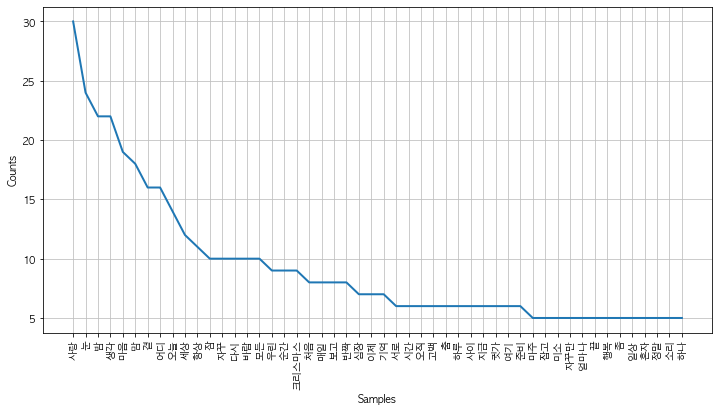

In [40]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
token_happy50.plot(50)
plt.show()

In [41]:
# 상위 50개만 wordcloud로 그리기
# 구한데이터로 그리기
data50 = token_happy50.vocab().most_common(50)

# 딕셔너리로 만들기
tmp_data50 = dict(data50)

wordcloud50 = WordCloud(
    background_color='White',
    relative_scaling=0.2,
    font_path="AppleGothic" # 윈도우 => 'c:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(tmp_data50)

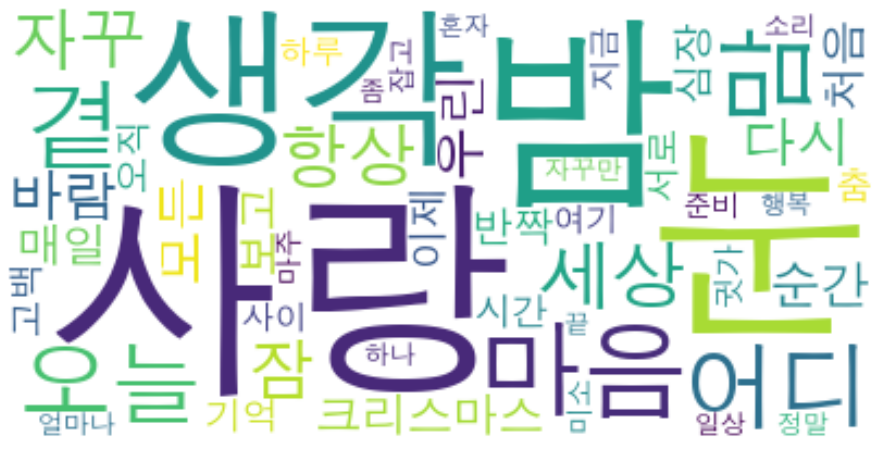

In [42]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud50, interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
# 후회테마 20곡의 상위 100개 단어 확인
# 불용어 처리후
token_happy100 = nltk.Text(token_happy50)
token_happy100.vocab().most_common(100)


[('사랑', 30),
 ('눈', 24),
 ('밤', 22),
 ('생각', 22),
 ('마음', 19),
 ('맘', 18),
 ('곁', 16),
 ('어디', 16),
 ('오늘', 14),
 ('세상', 12),
 ('항상', 11),
 ('잠', 10),
 ('자꾸', 10),
 ('다시', 10),
 ('바람', 10),
 ('모든', 10),
 ('우린', 9),
 ('순간', 9),
 ('크리스마스', 9),
 ('처음', 8),
 ('매일', 8),
 ('보고', 8),
 ('반짝', 8),
 ('심장', 7),
 ('이제', 7),
 ('기억', 7),
 ('서로', 6),
 ('시간', 6),
 ('오직', 6),
 ('고백', 6),
 ('춤', 6),
 ('하루', 6),
 ('사이', 6),
 ('지금', 6),
 ('귓가', 6),
 ('여기', 6),
 ('준비', 6),
 ('마주', 5),
 ('잡고', 5),
 ('미소', 5),
 ('자꾸만', 5),
 ('얼마나', 5),
 ('끝', 5),
 ('행복', 5),
 ('좀', 5),
 ('일상', 5),
 ('혼자', 5),
 ('정말', 5),
 ('소리', 5),
 ('하나', 5),
 ('영원', 4),
 ('햇살', 4),
 ('둘', 4),
 ('언제', 4),
 ('그날', 4),
 ('추억', 4),
 ('그냥', 4),
 ('별', 4),
 ('해도', 4),
 ('제일', 4),
 ('저기', 4),
 ('전부', 4),
 ('꼭', 4),
 ('빛', 4),
 ('입술', 4),
 ('둘이서', 3),
 ('모습', 3),
 ('가슴', 3),
 ('문득', 3),
 ('향', 3),
 ('어딘가', 3),
 ('표현', 3),
 ('지나', 3),
 ('점점', 3),
 ('그간', 3),
 ('설레임', 3),
 ('미래', 3),
 ('변명', 3),
 ('진심', 3),
 ('눈빛', 3),
 ('눈치', 3),
 ('겨울', 3),
 ('눈앞

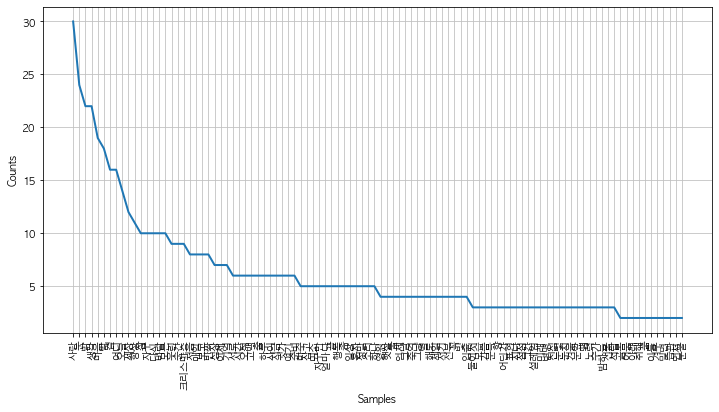

In [44]:
# 상위 100개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
token_happy100.plot(100)
plt.show()

In [45]:
# 상위 50개만 wordcloud로 그리기
# 구한데이터로 그리기
data100 = token_happy100.vocab().most_common(100)

# 딕셔너리로 만들기
tmp_data100 = dict(data100)

wordcloud100 = WordCloud(
    background_color='White',
    relative_scaling=0.2,
    font_path="AppleGothic" # 윈도우 => 'c:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(tmp_data100)

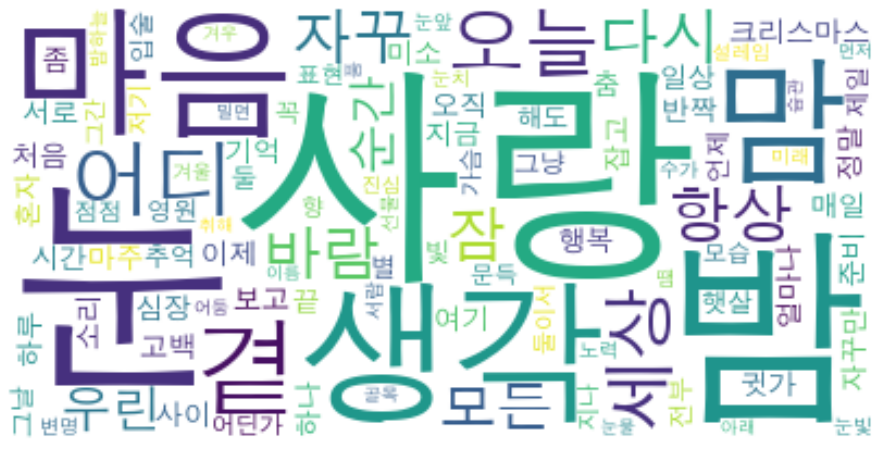

In [46]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud100, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
test = total20